# Used Cars Dataset 




The dataset contains records of used cars collected from syarah.com Each row represents a used car with a link to its webpage. Other information regarding each car is the brand name, model, manufacturing year, origin, the color of the car, options, capacity of the engine, type of fuel, transmission type, the mileage that the car covered, region price, and negotiable.


<ul><b>Team members:</b>
        <li> Alfaisal alqahtani </li>
        <li> Fatema Buhuligah </li>
        <li> Sarah Alharbi </li>
        <li> Sanad  </li>
        <li> Saleh Alabbas</li>
        </ul>

## Import Libraries 

In [1]:
# imporitng the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import mplcyberpunk




## Load Data

In [2]:
# import the dataset
df = pd.read_csv("cars.csv")

# Exploratory Data Analysis  (EDA)

In [3]:
df.head()

,Unnamed: 0,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,6153,Toyota,Camry,2020,Saudi,Brown,Semi Full,2.5,Gas,Automatic,38000,Riyadh,1364,False
1,4434,Toyota,FJ,2012,Saudi,Black,Full,4.0,Gas,Automatic,35000,Riyadh,70000,False
2,3537,Chevrolet,Suburban,2009,Saudi,White,Standard,5.3,Gas,Automatic,255,Riyadh,36000,False
3,1666,Ford,Explorer,2016,Other,White,Full,3.5,Gas,Automatic,128644,Riyadh,118000,False
4,3513,Toyota,Corolla,2018,Saudi,White,Standard,1.6,Gas,Automatic,19190,Jeddah,55000,False


In [4]:
# How many rows and columns?
df.shape

(6428, 14)

In [5]:
# What are the column names?
df.columns

Index(['Unnamed: 0', 'Make', 'Type', 'Year', 'Origin', 'Color', 'Options',
       'Engine_Size', 'Fuel_Type', 'Gear_Type', 'Mileage', 'Region', 'Price',
       'Negotiable'],
      dtype='object')

#### The features in the dataset
- Make: Car company'name
- Type: Car type
- Year: Production year
- Origin: If  it from Saudi Arabia or Gulf countries or other
- Color: Car color
- Options: Full, Semi Full, Standard
- Engine_Size
- Fule_Type: Gas, Diesel, Hybrid
- Gear_Type: Automatic, Manual
- Mileage: the distance travel
- Region: the region of the car
- Price: price of the car (if 0 or 1 it means open for auction)
- Negotiable: (True/False) if the price is negotiable

In [6]:
# Show a quick summary statistics of the numerical variables we have
df.describe()

,Unnamed: 0,Year,Engine_Size,Mileage,Price
count,6428.000000,6428.000000,6428.000000,6.428000e+03,6.428000e+03
mean,4001.298538,2014.120566,3.299284,1.476798e+05,5.395469e+04
std,2308.032075,5.690005,1.523697,3.582324e+05,7.300146e+04
min,0.000000,1964.000000,1.000000,1.000000e+02,0.000000e+00
25%,2003.750000,2012.000000,2.000000,3.700000e+04,0.000000e+00
50%,3998.500000,2016.000000,3.000000,1.018995e+05,3.700000e+04
75%,5979.250000,2018.000000,4.500000,1.950000e+05,7.300000e+04
max,8034.000000,2022.000000,9.000000,2.000000e+07,1.150000e+06


<ui>We could notice that: </ui>
<li>
The year of the used cars in our dataset are from 1964 until 2022, Wheras 75% of the cars were from 2018 and older.  </li>

<li>The engine size ranging between 1-litre and 9-litre.</li>

<li>The Mileage is started from 100 to 20000000.</li>

<li>The price ranging from 0 to 1150000. <b>"some people didn't put an initial price that could be by mistake or they want the buyers to start opening the bid."</b></li>



In [7]:
#checking for total null values 
df.isnull().sum() 

Unnamed: 0     0
Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
Negotiable     0
dtype: int64

In [8]:
# what are the types of values in each column?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6428 entries, 0 to 6427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   6428 non-null   int64  
 1   Make         6428 non-null   object 
 2   Type         6428 non-null   object 
 3   Year         6428 non-null   int64  
 4   Origin       6428 non-null   object 
 5   Color        6428 non-null   object 
 6   Options      6428 non-null   object 
 7   Engine_Size  6428 non-null   float64
 8   Fuel_Type    6428 non-null   object 
 9   Gear_Type    6428 non-null   object 
 10  Mileage      6428 non-null   int64  
 11  Region       6428 non-null   object 
 12  Price        6428 non-null   int64  
 13  Negotiable   6428 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(8)
memory usage: 659.2+ KB


In [9]:
# show the last 5 rows of the dataset
df.tail(5)

,Unnamed: 0,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
6423,6017,Mercedes,CLS,2014,Saudi,Brown,Full,3.5,Gas,Automatic,130,Jeddah,100000,False
6424,709,GMC,Acadia,2014,Saudi,Red,Full,3.6,Gas,Automatic,250000,Khobar,50000,False
6425,2487,Audi,Q5,2018,Saudi,Another Color,Standard,2.5,Gas,Automatic,17000,Jeddah,138000,False
6426,174,Renault,Symbol,2020,Saudi,White,Standard,1.6,Gas,Automatic,46505,Riyadh,26000,False
6427,1146,Ford,Expedition,2006,Other,Black,Full,5.4,Gas,Automatic,341,Al-Jouf,0,True


In [10]:
# check if there's any duplicated row
df.duplicated().sum()


0

## How many Fuel Type?

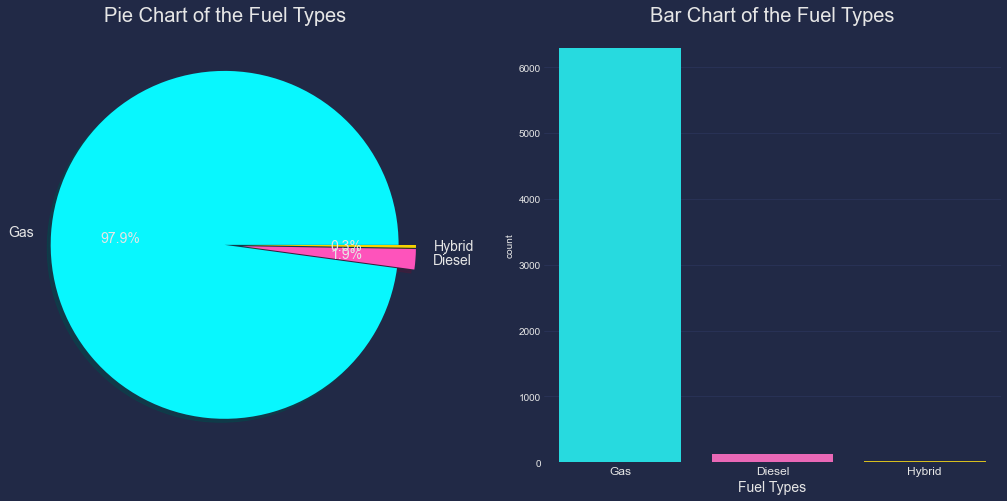

In [100]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Fuel_Type'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, textprops={'fontsize': 14})
ax[0].set_title('Pie Chart of the Fuel Types' , fontsize=20)
ax[0].set_ylabel('')
sns.countplot('Fuel_Type',data=df,ax=ax[1])
ax[1].set_title('Bar Chart of the Fuel Types', fontsize=20)
plt.xlabel('Fuel Types',fontsize=14) 
plt.xticks(fontsize=12)


plt.show()


plt.style.use("cyberpunk")



plt.show()

 <b> It's clear that Gas is considered one of the most popular in our dataset, with a percentage of 97.9.</b>

## Popularity of the Car brands

In [14]:
# how many unique value in Make column
df.Make.nunique()

59

Text(0.5, 1.0, 'Top 10 Most Popular of the Used Car Brands')

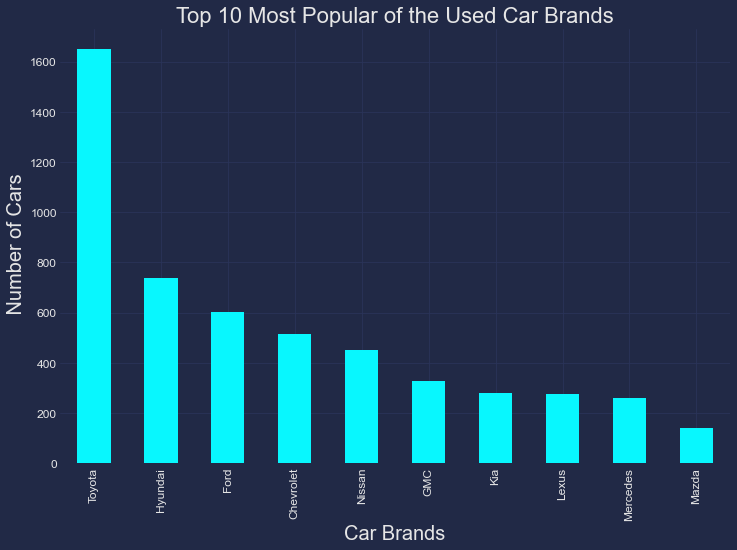

In [15]:
# Bar chart for Top 10 Most Popular of the Used Car Brands



gry=df

cars_make= gry.groupby('Make')['Make'].count()
cars_make = pd.DataFrame(cars_make)
cars_make.columns = ['Used Cars']
cars_make.sort_values(by=['Used Cars'], inplace=True, ascending=False)

cars_make = cars_make.head(10)

#plt.title("The most popular brands of the cars")
plt.style.use("cyberpunk")
cars_make.plot.bar(fontsize=12, figsize=(12, 8))
plt.legend("")
plt.xlabel('Car Brands',fontsize=20) # using a size in points
plt.ylabel(' Number of Cars',fontsize=20) # using a size in points
plt.title('Top 10 Most Popular of the Used Car Brands',fontsize=22)



## What are the most popular years of the cars

In [16]:
# what are the unique value in Year column
df.Year.unique()

array([2020, 2012, 2009, 2016, 2018, 2003, 1998, 2013, 2017, 2010, 2014,
       2019, 2015, 2002, 2006, 2001, 2021, 2007, 2008, 2011, 2004, 2005,
       1983, 1990, 1999, 1985, 1996, 1997, 1995, 2000, 1994, 1986, 1989,
       1991, 1993, 1992, 1979, 1977, 1972, 1970, 1988, 1964, 1978, 2022,
       1975, 1987, 1980, 1981, 1982, 1965, 1984])

In [17]:
# normalize the year of the cars
freq = df.Year.value_counts(normalize=True)
#replace the small categories to "other"
year_updated = df.Year.replace(freq[freq<0.05].index , "other")

#Check after the edit (print with percentage )
year_updated.value_counts(normalize=True).mul(100)

other    27.613566
2016     14.810205
2017     10.112010
2015      9.769757
2018      9.738643
2019      7.685128
2014      7.016179
2020      6.907281
2013      6.347231
Name: Year, dtype: float64

 <b>As we can see in our dataset, the most common car year is 2016, followed by 2017, which are represent almost a quarter of our dataset.</b>

## What are the most popular Region of the cars

In [18]:
# what are the unique value in Region column
df.Region.unique()

array(['Riyadh', 'Jeddah', 'Abha', 'Dammam', 'Qassim', 'Taef',
       'Al-Medina', 'Aseer', 'Wadi Dawasir', 'Al-Ahsa', 'Tabouk',
       'Makkah', 'Jazan', 'Khobar', 'Al-Jouf', 'Hafar Al-Batin', 'Yanbu',
       'Jubail', 'Najran', 'Al-Baha', 'Arar', 'Hail', 'Al-Namas',
       'Sakaka', 'Besha', 'Qurayyat', 'Sabya'], dtype=object)

In [19]:
# normalize the year of the cars
freq = df.Region.value_counts()
#replace the Region with less than 100 cars to "other" category
region_updated = df.Region.replace(freq[freq<100].index , "other")

#Check after the edit (print with percentage )
region_updated.value_counts(normalize=True).mul(100)

Riyadh       39.887990
Dammam       17.268202
Jeddah       13.332296
other        10.034225
Qassim        3.889235
Al-Medina     3.795893
Aseer         2.831363
Al-Ahsa       2.831363
Makkah        2.815806
Taef          1.726820
Tabouk        1.586808
Name: Region, dtype: float64

Text(0.5, 1.0, 'Top 10 Most Popular Regions of the Used Cars')

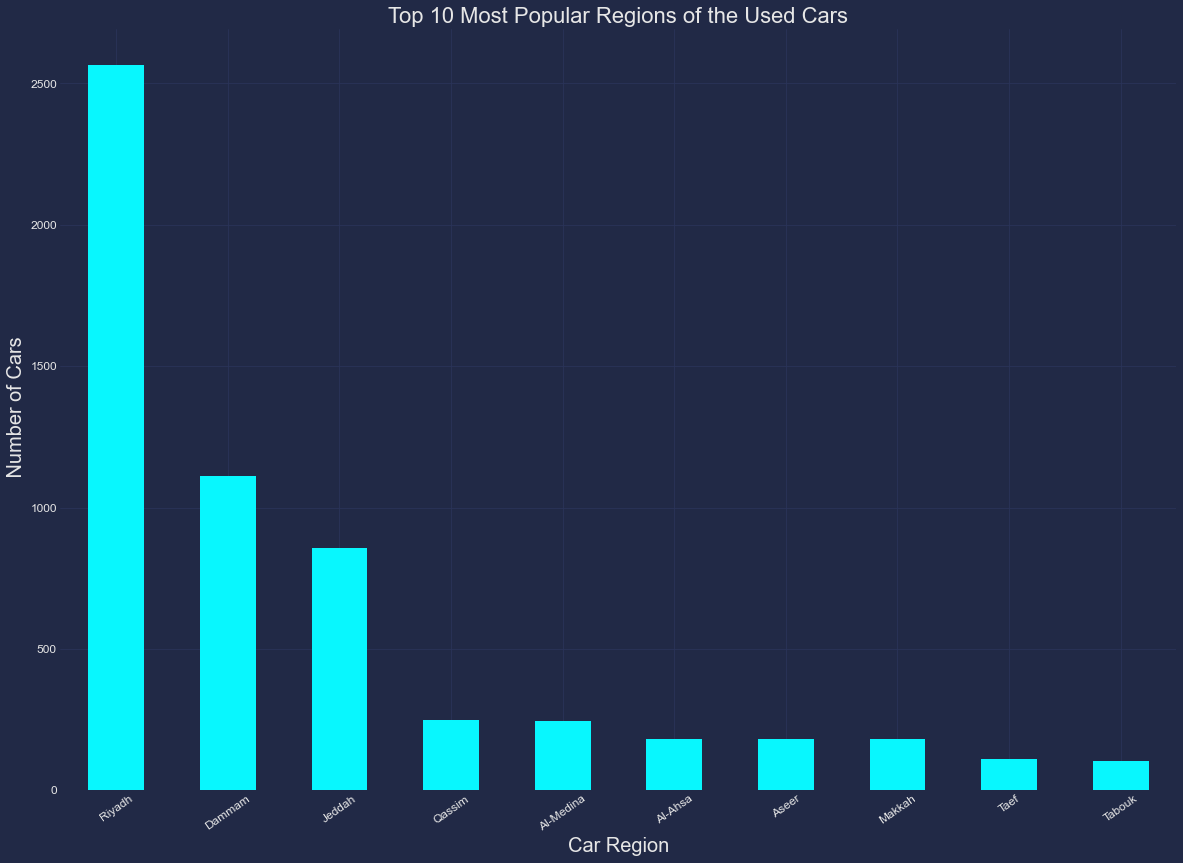

In [113]:

# Bar chart for Top 10 Most Popular Regions of the Used Cars

gry=df

cars_region= gry.groupby('Region')['Region'].count()
cars_region = pd.DataFrame(cars_region)
cars_region.columns = ['region Cars']
cars_region.sort_values(by=['region Cars'], inplace=True, ascending=False)

cars_region = cars_region.head(10)

#plt.title("The most popular brands of the cars")
plt.style.use("cyberpunk")
a = cars_region.plot.bar(fontsize=12, figsize=(20, 14))
plt.legend("")
plt.xticks(rotation=35)
plt.xlabel('Car Region',fontsize=20) # using a size in points
plt.ylabel(' Number of Cars',fontsize=20) # using a size in points
plt.title('Top 10 Most Popular Regions of the Used Cars',fontsize=22)


In [21]:
# number of observation in each unique price value
df.Price.value_counts()

0         2021
45000      121
35000      107
55000      102
30000       94
          ... 
56600        1
349000       1
445000       1
1013         1
1046         1
Name: Price, Length: 488, dtype: int64

In [22]:
# check the price if less than 100
df[df.Price < 100].Price.value_counts()

0    2021
1       1
Name: Price, dtype: int64

## The distribution plot for the Price

<AxesSubplot:xlabel='Price', ylabel='Density'>

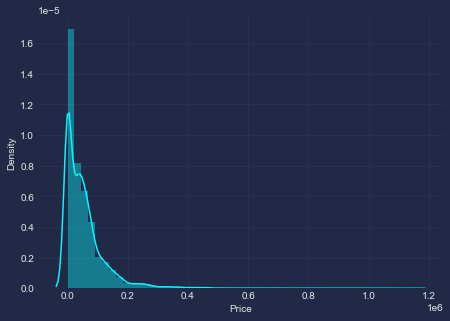

In [86]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_clean['Price'])


# Data Cleaning

Issues:
- Unnamed: 0 column is meaningless 
- Price column contain 2021 observations with the value (0) and one observation with value (1)



In [23]:
# first step is making a copy of the dataframe
df_clean = df.copy()

## Renaming Column

In [24]:
# renamimng the Unnamed: 0 column to  index
df_clean.rename(columns={'Unnamed: 0': 'index'}, inplace=True)

In [25]:
# setting the first column as index
df_clean = df_clean.set_index('index')

## Handling Outliers

Let's see if there're any outliers in the <b> Target variable </b>. Thus, we could remove the outliers to increase the accuracy of the models, as the outliers mislead training process.
The difference between 75% value and the maximum value is quite large. Therefore, we could remove all the Zeros from our dataset.